In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('learningSet.csv', low_memory=False)

In [5]:
data.shape

(95412, 481)

In [6]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [7]:
data['TARGET_D'].value_counts()

0.00      90569
10.00       941
15.00       591
20.00       577
5.00        503
          ...  
101.00        1
4.50          1
55.00         1
10.70         1
13.92         1
Name: TARGET_D, Length: 71, dtype: int64

<AxesSubplot:ylabel='Frequency'>

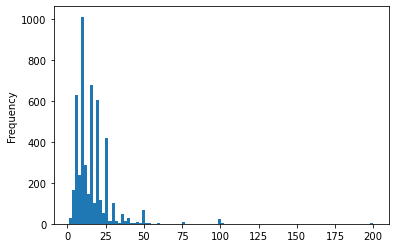

In [8]:
data[data['TARGET_D']!=0]['TARGET_D'].plot(kind='hist', bins=100)

In [9]:
data[(data['TARGET_B']==0) & (data['TARGET_D'] != 0)]

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2


<AxesSubplot:xlabel='TARGET_D', ylabel='Count'>

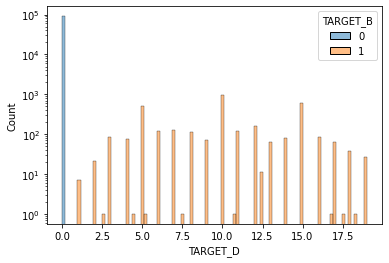

In [10]:
data_prep = data[data['TARGET_D'] < 20]
sns.histplot(data=data_prep,
             x='TARGET_D',
             hue='TARGET_B',
             log_scale=(False, True),
             bins=100
            )

In [11]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()

In [12]:
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

In [13]:
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.001383


<AxesSubplot:ylabel='Frequency'>

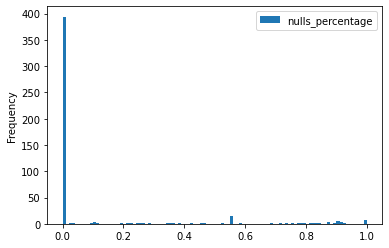

In [14]:
# histogram of the null value distribution of your 450 columns
nulls_percent_df.sort_values(by=['nulls_percentage'], ascending=False).plot(kind='hist', bins=100)

In [15]:
# column names with null values above 25%
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage'] > 0.25]['column_name']

In [16]:
len(columns_above_threshold)

72

In [17]:
drop_column_list = list(columns_above_threshold)

In [18]:
drop_column_list

['NUMCHLD',
 'WEALTH1',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'WEALTH2',
 'ADATE_5',
 'ADATE_10',
 'ADATE_13',
 'ADATE_15',
 'ADATE_17',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 'RAMNT_18',
 'RAMNT_19',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_22',
 'RAMNT_23',
 'RAMNT_24']

In [19]:
data['MAILCODE'].value_counts()

     94013
B     1399
Name: MAILCODE, dtype: int64

In [20]:
data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))

In [21]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

In [22]:
data['MAILCODE'].value_counts()

A    94013
B     1399
Name: MAILCODE, dtype: int64

In [57]:
data['OSOURCE'].value_counts()

MBC    4539
SYN    3563
AML    3430
BHG    3324
IMP    2986
       ... 
AI2       1
HUD       1
MFA       1
MAS       1
NHE       1
Name: OSOURCE, Length: 895, dtype: int64

In [59]:
data['ZIP'].value_counts()

85351     61
92653     59
85710     54
95608     50
60619     45
          ..
57216      1
16915      1
38501-     1
58032      1
76448      1
Name: ZIP, Length: 19938, dtype: int64

In [60]:
drop_list = ['OSOURCE','ZIP']

## Categoricals

Instructions
Complete the following steps on the categorical columns in the dataset:

Check for null values in all the columns

Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

OSOURCE - symbol definitions not provided, too many categories
ZIP CODE - we are including state already
Identify columns that over 85% missing values

Remove those columns from the dataframe

Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

In [49]:
categorical = data.select_dtypes(np.object)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,T2,36,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,S1,14,E,H,NaN,NaN,NaN,M,M,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,NaN,NaN,NaN,L1E,NaN,NaN,N1E,N1E,N1E,N1E,NaN,F1E,L,G,X,X,X,A
2,AMH,NC,27017,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,R2,43,NaN,U,NaN,NaN,NaN,NaN,M,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,NaN,S4F,S4F,S4F,S4F,S4F,S4F,NaN,S4D,S4D,NaN,NaN,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,R2,44,E,U,NaN,NaN,NaN,NaN,F,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,NaN,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,NaN,NaN,L,E,X,X,X,C
4,NaN,FL,33176,A,NaN,0,X,X,NaN,NaN,XXXX,S2,16,E,H,NaN,NaN,NaN,NaN,F,3,NaN,12,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,Y,NaN,NaN,Y,NaN,Y,NaN,Y,NaN,Y,NaN,3,NaN,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,NaN,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


In [50]:
nulls_percent_categoricals = pd.DataFrame(categorical.isna().sum()/len(categorical)).reset_index()

In [51]:
nulls_percent_categoricals.shape

(74, 2)

In [52]:
nulls_percent_categoricals.columns = ['column_name', 'nulls_percentage']

In [53]:
nulls_percent_categoricals

,column_name,nulls_percentage
0,OSOURCE,0.009726
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.000000
4,PVASTATE,0.984719
...,...,...
69,RFA_2A,0.000000
70,MDMAUD_R,0.000000
71,MDMAUD_F,0.000000
72,MDMAUD_A,0.000000


In [54]:
# column names with null values above 25%
columns_above_threshold = nulls_percent_categoricals[nulls_percent_categoricals['nulls_percentage'] > 0.85]['column_name']

In [56]:
columns_above_threshold

4     PVASTATE
6     RECINHSE
7        RECP3
8      RECPGVG
9     RECSWEEP
15     CHILD03
16     CHILD07
17     CHILD12
18     CHILD18
21       SOLP3
22       SOLIH
23       MAJOR
25    COLLECT1
26    VETERANS
27       BIBLE
28       CATLG
29       HOMEE
31      CDPLAY
32      STEREO
33    PCOWNERS
34       PHOTO
35      CRAFTS
36      FISHER
37    GARDENIN
38       BOATS
39      WALKER
40    KIDSTUFF
41       CARDS
42      PLATES
Name: column_name, dtype: object

In [ ]:
for item in columns_above_threshold:
    categorical.remove(item)